# Exploratory Data Analysis   
__The following exploration is done to analyze which of the 2 cab companies, Yellow Company or Pink Company, is the better choice to invest in.__     

The following features are present in the dataset:    
1. txnID (Transaction ID): Unique id assigned to each of the rides that were done by either of the companies     
2. custID (Customer ID): Unique id assigned to each customer. Note that values in this field can be repeated as the same customer could have taken multiple rides with both the companies   
3. date (Date of Ride): The day of each month that the ride took place on   
4. month (Month of Ride): The month in which the ride took place   
5. year (Year of Ride): The year in which the ride took place    
6. day_name (Day Name): Name of the day on which the ride took place    
7. distance (Distance): The length/distance of each ride   
8. city (City): City in which the ride took place   
9. state (State): State of the city in which the ride took place    
10. cost (Cost): Cost incurred by each company for each ride   
11. price (Price): Price charged by each company for each ride  
12. profit (Profit): Profit earned by the company on each ride (Price-Cost)   
13. population (Population): Population of the city in which the ride took place   
14. user (User): Number of cab users that the city has    
15. pay_mode (Mode of Payment): The mode of payment that the customer used to pay for the ride   
16. gender (Gender): The gender of the customer    
17. age (Age): Age of the customer   
18. monthly_income (Monthly Income): Monthly income of the customer in US Dollars     19.
19. company (Company): Which company undertook the ride   
20. Holiday (Holiday): The name of the holiday on the date of the ride    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

%matplotlib inline

In [2]:
# Reading in the dataset created after data cleaning
df = pd.read_csv('Datasets/Master_Data.csv')
df.head()

,txnID,custID,date,month,year,day_name,distance,city,state,cost,price,profit,population,user,pay_mode,gender,age,monthly_income,company,Holiday
0,10000011,29290,7,January,2016,Thursday,30.45,ATLANTA,GA,313.635,370.95,57.315,814885,24701,Card,Male,28,10813,Pink Cab,NaN
1,10000012,27703,5,January,2016,Tuesday,28.62,ATLANTA,GA,334.854,358.52,23.666,814885,24701,Card,Male,27,9237,Pink Cab,NaN
2,10000013,28712,1,January,2016,Friday,9.04,ATLANTA,GA,97.632,125.20,27.568,814885,24701,Cash,Male,53,11242,Pink Cab,New Year's Day
3,10000014,28020,6,January,2016,Wednesday,33.17,ATLANTA,GA,351.602,377.40,25.798,814885,24701,Cash,Male,23,23327,Pink Cab,NaN
4,10000015,27182,2,January,2016,Saturday,8.73,ATLANTA,GA,97.776,114.62,16.844,814885,24701,Card,Male,33,8536,Pink Cab,NaN


In [3]:
# Getting some statistical information regarding the numerical data. Since the txnID is unique for all the records, we can take that as index
df = df.set_index('txnID')
df.describe()

,custID,date,year,distance,cost,price,profit,population,user,age,monthly_income
count,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,23889.276623,15.608133,2017.045199,22.567254,286.190113,423.443311,137.253198,3.132198e+06,158365.582267,35.362109,15091.469465
std,21220.895588,8.825601,0.800239,12.233526,157.993661,274.378911,160.311840,3.315194e+06,100850.051020,12.589699,7988.860168
min,1.000000,1.000000,2016.000000,1.900000,19.000000,15.600000,-220.060000,2.489680e+05,3643.000000,18.000000,2000.000000
25%,3674.000000,8.000000,2016.000000,12.000000,151.200000,206.437500,28.012000,6.712380e+05,80021.000000,25.000000,8387.000000
50%,17080.000000,16.000000,2017.000000,22.440000,282.480000,386.360000,81.962000,1.595037e+06,144132.000000,33.000000,14763.500000
75%,43945.000000,23.000000,2018.000000,32.960000,413.683200,583.660000,190.030000,8.405837e+06,302149.000000,42.000000,21085.000000
max,60000.000000,31.000000,2018.000000,48.000000,691.200000,2048.030000,1463.966000,8.405837e+06,302149.000000,65.000000,35000.000000


In [4]:
# Getting informtion about a field's dtype and number of non-null values in it 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 10000011 to 10440107
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   custID          359392 non-null  int64  
 1   date            359392 non-null  int64  
 2   month           359392 non-null  object 
 3   year            359392 non-null  int64  
 4   day_name        359392 non-null  object 
 5   distance        359392 non-null  float64
 6   city            359392 non-null  object 
 7   state           359392 non-null  object 
 8   cost            359392 non-null  float64
 9   price           359392 non-null  float64
 10  profit          359392 non-null  float64
 11  population      359392 non-null  int64  
 12  user            359392 non-null  int64  
 13  pay_mode        359392 non-null  object 
 14  gender          359392 non-null  object 
 15  age             359392 non-null  int64  
 16  monthly_income  359392 non-null  int64  
 17  c

Here, we see that the Holiday feature has only 10906 not-null rows. While this might seem to be bad, it is useful information as it shows us that the ride took place on a day that wasn't a Federal US Holiday.

In [5]:
# Getting the corre;ation between all the numeric fields in the dataframe
corr = df.corr()
corr

,custID,date,year,distance,cost,price,profit,population,user,age,monthly_income
custID,1.000000,0.019101,-0.005484,-0.000542,-0.001660,-0.005535,-0.007838,-0.003985,-0.003920,-0.002870,-0.006665
date,0.019101,1.000000,-0.017993,0.001653,0.002071,-0.004563,-0.009851,0.001253,0.000734,0.002069,-0.001803
year,-0.005484,-0.017993,1.000000,-0.001072,-0.001773,-0.036409,-0.060567,0.000003,-0.000771,-0.001416,0.000118
distance,-0.000542,0.001653,-0.001072,1.000000,0.981848,0.835753,0.462768,-0.002311,-0.000428,0.001411,0.002254
cost,-0.001660,0.002071,-0.001773,0.981848,1.000000,0.859812,0.486056,0.015108,0.023628,0.001596,0.002634
price,-0.005535,-0.004563,-0.036409,0.835753,0.859812,1.000000,0.864154,0.326589,0.281061,0.002324,0.003890
profit,-0.007838,-0.009851,-0.060567,0.462768,0.486056,0.864154,1.000000,0.544079,0.457758,0.002405,0.004062
population,-0.003985,0.001253,0.000003,-0.002311,0.015108,0.326589,0.544079,1.000000,0.915490,0.000697,0.002127
user,-0.003920,0.000734,-0.000771,-0.000428,0.023628,0.281061,0.457758,0.915490,1.000000,0.000681,0.003231
age,-0.002870,0.002069,-0.001416,0.001411,0.001596,0.002324,0.002405,0.000697,0.000681,1.000000,-0.000158


## Analysis of both the companies rides and profits differentiated by year    

__ Here, we will see the difference in numner of rides and avg. profit for each company in all the years that we are analyzing i.e. 2016, 2017 and 2018.__

In [6]:
# Function defined in order to get a grouped dataframe with multiple indices
def get_grouped_df(df, indices, val, mean=False):
    if mean:
        grouped = pd.DataFrame(df.groupby(indices)[val].mean())
    else:
        grouped = pd.DataFrame(df.groupby(indices)[val].value_counts())
    df_list = []
    for index, row in grouped.iterrows():
        df_list.append([index[0], index[1], row[val]])
    group_df = pd.DataFrame(df_list)
    group_df.columns = indices+[val]
    return group_df

In [7]:
group_df = get_grouped_df(df, ['company','year'], 'profit', mean=False)

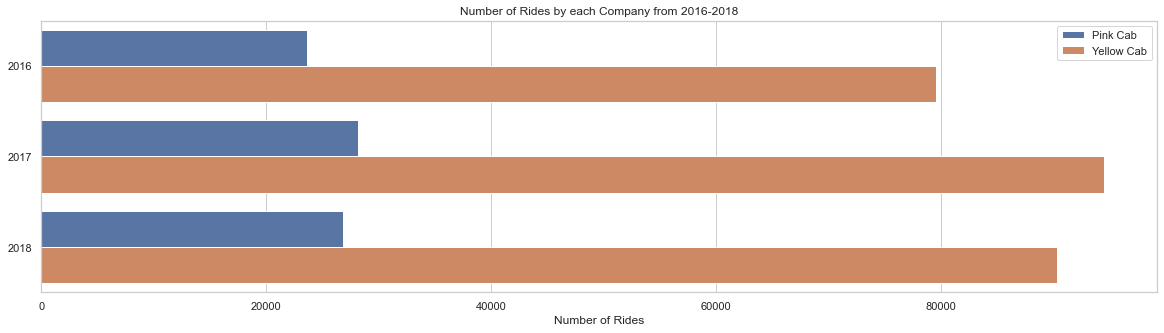

In [8]:
fig = plt.figure(figsize=(20,5))
sns.set_theme(style='whitegrid')
sns.countplot(y='year', hue='company', data=group_df).set_title('Number of Rides by each Company from 2016-2018')
plt.legend(title='')
plt.xlabel('Number of Rides')
plt.ylabel('')
plt.show()

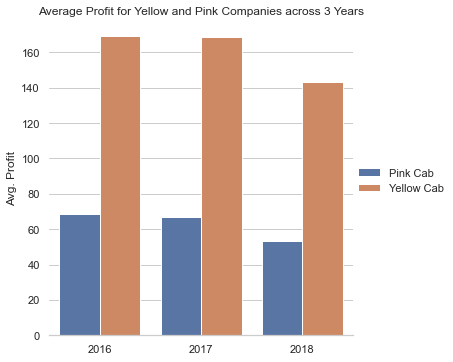

In [9]:
group_df = get_grouped_df(df, ['company','year'], 'profit', mean=True)
group_df.columns = ['Company','Year','Avg. Profit']
sns.set_theme(style='whitegrid')
g = sns.catplot(x='Year', y='Avg. Profit', hue='Company', data=group_df, kind='bar')
plt.title('Average Profit for Yellow and Pink Companies across 3 Years')
g.despine(left=True)
g.set_axis_labels('','Avg. Profit')
g.legend.set_title('')

__We can see that the average profits made by the Yellow company is almost double that of the Pink comapny in all 3 years. This, however, negates our first hypothesis (Price has increased over the years)__

In [10]:
# Next, let's check out the month-wise split of rides taking place throughout the year throughout the 3 years
month_profit = df.groupby(['company','month']).profit.count()
# pd.DataFrame(month_profit)

In [11]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
ylist = []
plist = []
for month in months:
    ylist.append(month_profit.loc[('Yellow Cab', month)])
    plist.append(month_profit.loc['Pink Cab', month])

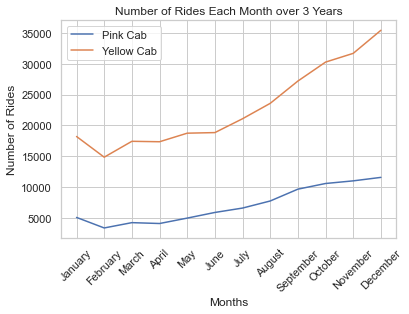

In [12]:
month_df = pd.DataFrame([months,plist,ylist])
month_df = month_df.T
month_df.columns = ['months','pink','yellow']
convert_dict = {'pink': int, 'yellow': int}
month_df = month_df.astype(convert_dict)
month_df.yellow.dtype
sns.lineplot(data=month_df, x='months', y='pink')
sns.lineplot(data=month_df, x='months', y='yellow')
plt.xlabel('Months')
plt.ylabel('Number of Rides')
plt.legend(['Pink Cab','Yellow Cab'])
plt.xticks(rotation=45)
plt.title('Number of Rides Each Month over 3 Years')
plt.show()

__We can see from the line plot that the sales of both the companies follow a similar pattern, with the yellow company having a much higher number. We do find that the number of rides significcantly increases towards the end of the year for both the companies. One possible reason for this is is the weather. January and February are one of the colder months in some parts of the US. Another reason could be New Year's Resolutions. As the new year starts, a lot of people take up a resolution to become fitter. Maybe that's why at the beginning of the year, the number of customers actually using cabs were low as they preferred walking. But as they got to the end of the year, thisw wasn't as much of a priority to many people. Hence, cab users went up.__

__We will next analyze income and ride patterns seen in the data. For this analysis, we will spliut the data into 2 equal sized bins. This gives us the most statistically accurate result when it comes to average profit and other metrics.__

In [13]:
df.head()

,custID,date,month,year,day_name,distance,city,state,cost,price,profit,population,user,pay_mode,gender,age,monthly_income,company,Holiday
txnID,,,,,,,,,,,,,,,,,,,
10000011,29290,7,January,2016,Thursday,30.45,ATLANTA,GA,313.635,370.95,57.315,814885,24701,Card,Male,28,10813,Pink Cab,NaN
10000012,27703,5,January,2016,Tuesday,28.62,ATLANTA,GA,334.854,358.52,23.666,814885,24701,Card,Male,27,9237,Pink Cab,NaN
10000013,28712,1,January,2016,Friday,9.04,ATLANTA,GA,97.632,125.20,27.568,814885,24701,Cash,Male,53,11242,Pink Cab,New Year's Day
10000014,28020,6,January,2016,Wednesday,33.17,ATLANTA,GA,351.602,377.40,25.798,814885,24701,Cash,Male,23,23327,Pink Cab,NaN
10000015,27182,2,January,2016,Saturday,8.73,ATLANTA,GA,97.776,114.62,16.844,814885,24701,Card,Male,33,8536,Pink Cab,NaN


In [14]:
df['income_level'] = pd.qcut(df.monthly_income, q=2)
df.income_level.value_counts()

(1999.999, 14763.5]    179696
(14763.5, 35000.0]     179696
Name: income_level, dtype: int64

__As we can see here, in order to get equal sized bins, the break_point we will use is $14763.5.__

In [15]:
df.groupby('income_level').profit.mean()

income_level
(1999.999, 14763.5]    136.506319
(14763.5, 35000.0]     138.000078
Name: profit, dtype: float64

In [16]:
df.groupby('income_level').pay_mode.value_counts()

income_level         pay_mode
(1999.999, 14763.5]  Card        107845
                     Cash         71851
(14763.5, 35000.0]   Card        107697
                     Cash         71999
Name: pay_mode, dtype: int64

__ As seen above, there isn't too much difference in avg. profits between these 2 income groups. After checking the number of cash and card payments by income, we can observe that there is no significant difference between these counts as well.__

In [17]:
# Now, let's try to analyze profit by city and therefore, poopulation too
table = pd.pivot_table(df, values=['population','cost','price','profit'], index=['company','city'], aggfunc=np.mean)

In [18]:
table.head()

cost  population       price     profit
company  city                                                  
Pink Cab ATLANTA  247.619594      814885  302.131555  54.511961
         AUSTIN   241.502901      698371  320.435070  78.932168
         BOSTON   250.030529      248968  300.551489  50.520960
         CHICAGO  247.565821     1955130  281.613731  34.047910
         DALLAS   242.105281      942908  260.025652  17.920371

In [19]:
# This function is used to plot a line plot using seaborn
def line_plot(data, x, y, hue, title):
    f, ax = plt.subplots(figsize=(10,5))
    g = sns.lineplot(data=data, x=x, y=y, hue=hue)
    y = y[0].upper() + y[1:]
    plt.title(title)
    plt.ylabel(y+' ($)')
    ax.legend().set_title('')
    plt.xticks(rotation=90)

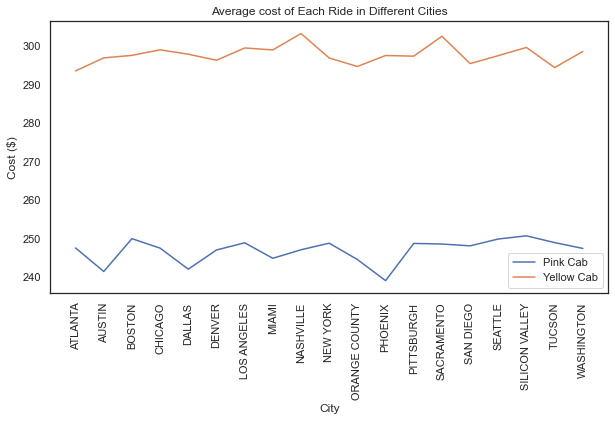

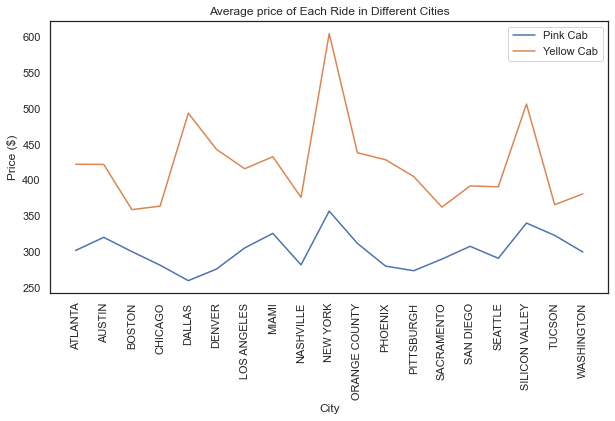

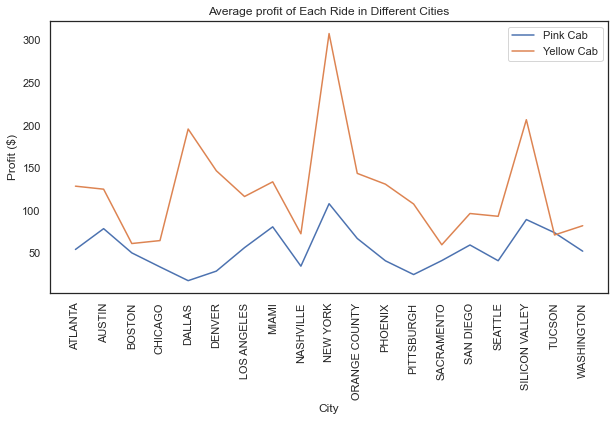

In [20]:
# Plotting a lineplot for each of the metrics comapring them in each city
metrics = ['cost','price','profit']
sns.set_theme(style='white')
for metric in metrics:
    line_plot(table, 'city', metric, 'company', 'Average {} of Each Ride in Different Cities'.format(metric))
    plt.xlabel('City')

In [21]:
no_holiday_df = df[df.Holiday.isnull()]
holiday_df = df[~df.Holiday.isnull()]
hol_grp = holiday_df.groupby('company').profit.mean()
no_hol_grp = no_holiday_df.groupby('company').profit.mean()
hol_grp.columns = ['Holiday']
pd.DataFrame(hol_grp)

,profit
company,
Pink Cab,73.798399
Yellow Cab,151.144129


In [22]:
pd.DataFrame(no_hol_grp)

,profit
company,
Pink Cab,62.281281
Yellow Cab,160.539718


__ From the above results, the average profit is higher on holidays than non-holidays for the Pink company and vice versa for the yellow company.__

In [23]:
df['age_level'] = pd.qcut(df['age'], q=2)
df['age_level'] = df.age_level.apply(lambda x: str(x))
df.age_level.value_counts()
df.groupby('age_level').profit.mean()

age_level
(17.999, 33.0]    136.899215
(33.0, 65.0]      137.625011
Name: profit, dtype: float64

__ By splitting the data into 2 (as close to ) equal-sized bins based on age, we observe that the average profit is pretty uniform for each of the age groups.__

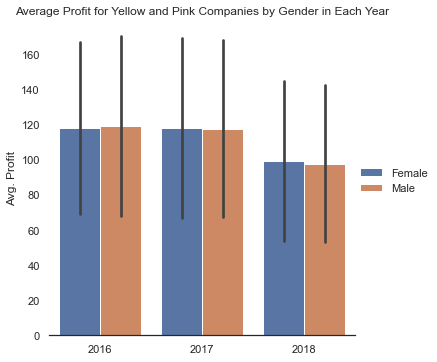

In [24]:
gender_distribution = pd.pivot_table(df, values=['profit'], index=['company','year','gender'],  aggfunc=np.mean).reset_index()
g = sns.catplot(x='year', y='profit', hue='gender', data=gender_distribution, kind='bar')
plt.title('Average Profit for Yellow and Pink Companies by Gender in Each Year')
g.despine(left=True)
g.set_axis_labels('','Avg. Profit')
g.legend.set_title('')

__ We see that the avg. profit by gender is pretty equal in all 3 years.__

In [25]:
# Stacked barplot for the holidays (number of rides)
total = df.groupby('Holiday').profit.count().reset_index()
total.columns = ['Holiday','count']
hol_avg = df.groupby(['company','Holiday']).profit.count().reset_index()
hol_avg.columns = ['company','Holiday','count']

In [26]:
yellow = df[df.company == 'Yellow Cab']
yellow = yellow.groupby('Holiday').profit.count().reset_index()
yellow.columns = ['Holiday','count']
total_list = [val[1].values for val in total.iteritems()]
yellow_list = [val[1].values for val in yellow.iteritems()]
total_list = list(total_list[1])
yellow_list = list(yellow_list[1])
yellow_final = []
for i in range(len(total_list)):
    yellow_final.append(float(yellow_list[i] / total_list[i]) * 100)
yellow_final
yellow['count'] = yellow_final
total['count'] = [i / j * 100 for i,j in zip(total['count'], total['count'])]

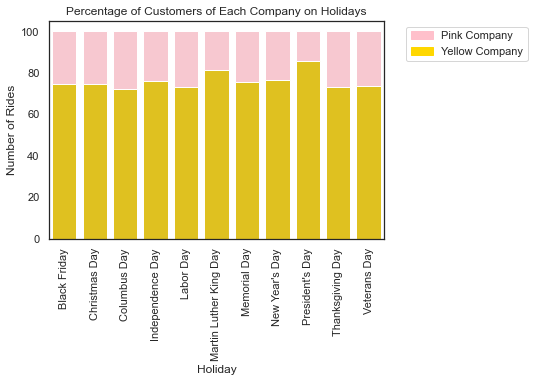

In [27]:
sns.barplot(x='Holiday', y='count', data=total, color='pink')
sns.barplot(x='Holiday', y='count', data=yellow, color='gold')
plt.xticks(rotation=90)
plt.ylabel('Number of Rides')
top_bar = mpatches.Patch(color='pink', label='Pink Company')
bottom = mpatches.Patch(color='gold', label='Yellow Company')
plt.title('Percentage of Customers of Each Company on Holidays')
plt.legend(handles=[top_bar, bottom], bbox_to_anchor=(1.05, 1), loc='upper left')

__ We see that the yellow company has a much higher percentage of rides on all the US holidays.__

In [28]:
# Let us now plot the % barplot for rides by state
state_wise = df.groupby('state').profit.count().reset_index()
state_wise.columns = ['state','count']

In [29]:
yellow = df[df.company == 'Yellow Cab']
yellow = yellow.groupby('state').profit.count().reset_index()
yellow.columns = ['state','count']
yellow['count'] = [(i / j) * 100 for i,j in zip(yellow['count'],state_wise['count'])]
state_wise['count'] = [(i / j) * 100 for i,j in zip(state_wise['count'],state_wise['count'])]

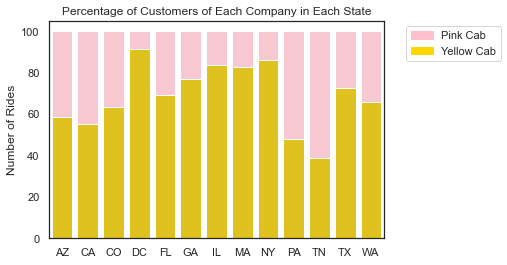

In [30]:
sns.barplot(x='state', y='count', data=state_wise, color='pink')
sns.barplot(x='state', y='count', data=yellow, color='gold')
plt.title('Percentage of Customers of Each Company in Each State')
plt.xlabel('')
plt.ylabel('Number of Rides')
top_bar = mpatches.Patch(color='pink', label='Pink Cab')
bottom = mpatches.Patch(color='gold', label='Yellow Cab')
plt.legend(handles=[top_bar, bottom], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

__ We will now analyze the cost, price and profit per KM for both companies in each year.__

In [31]:
added_df = df.copy()
added_df['cost_per_km'] = added_df.apply(lambda x: float(x['cost'] / x['distance']), axis=1)
added_df['price_per_km'] = added_df.apply(lambda x: float(x['price'] / x['distance']), axis=1)
added_df['profit_per_km'] = added_df.apply(lambda x: float(x['profit'] / x['distance']), axis=1)
added_df.head()

,custID,date,month,year,day_name,distance,city,state,cost,price,...,gender,age,monthly_income,company,Holiday,income_level,age_level,cost_per_km,price_per_km,profit_per_km
txnID,,,,,,,,,,,,,,,,,,,,,
10000011,29290,7,January,2016,Thursday,30.45,ATLANTA,GA,313.635,370.95,...,Male,28,10813,Pink Cab,NaN,"(1999.999, 14763.5]","(17.999, 33.0]",10.3,12.182266,1.882266
10000012,27703,5,January,2016,Tuesday,28.62,ATLANTA,GA,334.854,358.52,...,Male,27,9237,Pink Cab,NaN,"(1999.999, 14763.5]","(17.999, 33.0]",11.7,12.526904,0.826904
10000013,28712,1,January,2016,Friday,9.04,ATLANTA,GA,97.632,125.20,...,Male,53,11242,Pink Cab,New Year's Day,"(1999.999, 14763.5]","(33.0, 65.0]",10.8,13.849558,3.049558
10000014,28020,6,January,2016,Wednesday,33.17,ATLANTA,GA,351.602,377.40,...,Male,23,23327,Pink Cab,NaN,"(14763.5, 35000.0]","(17.999, 33.0]",10.6,11.377751,0.777751
10000015,27182,2,January,2016,Saturday,8.73,ATLANTA,GA,97.776,114.62,...,Male,33,8536,Pink Cab,NaN,"(1999.999, 14763.5]","(17.999, 33.0]",11.2,13.129439,1.929439


In [32]:
km_df = pd.pivot_table(added_df, values=['cost_per_km','price_per_km','profit_per_km'], index=['company','year']).reset_index()
km_df

,company,year,cost_per_km,price_per_km,profit_per_km
0,Pink Cab,2016,10.992815,14.019628,3.026813
1,Pink Cab,2017,10.998588,13.961471,2.962883
2,Pink Cab,2018,11.003569,13.354016,2.350447
3,Yellow Cab,2016,13.201233,20.691080,7.489847
4,Yellow Cab,2017,13.203314,20.697927,7.494612
5,Yellow Cab,2018,13.197118,19.561922,6.364805


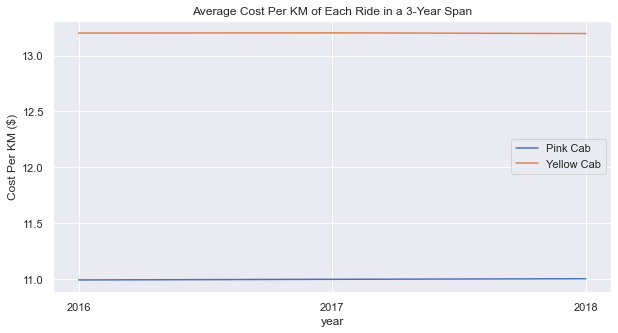

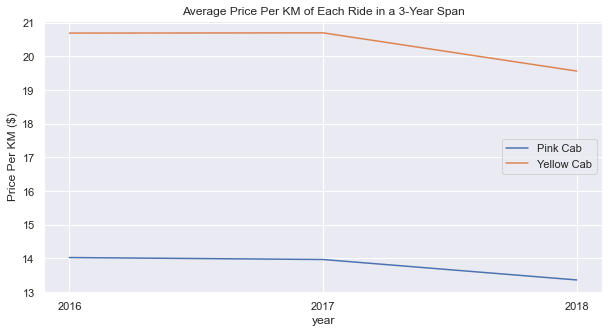

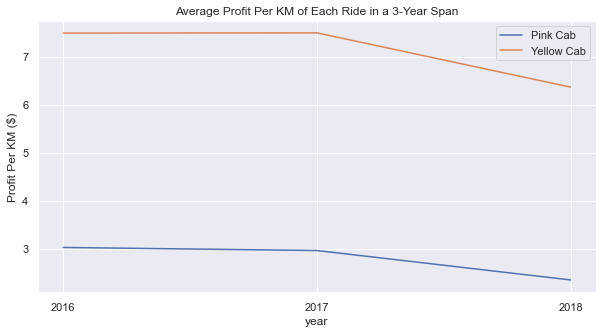

In [33]:
metrics = ['cost_per_km','price_per_km','profit_per_km']
convert_dict = {'year': str}
km_df = km_df.astype(convert_dict)
for metric in metrics:
    sns.set_theme(style='darkgrid')
    label = ''
    if metric == 'cost_per_km':
        label = 'Cost Per KM'
    elif metric == 'price_per_km':
        label = 'Price Per KM'
    else:
        label = 'Profit Per KM'
    line_plot(km_df, 'year', metric, 'company', 'Average {} of Each Ride in a 3-Year Span'.format(label))
    plt.xticks(rotation=0)
    plt.ylabel(label+' ($)')


__ Looking at the above plots, we see that the cost hasn't really reduced for either company, but the price has declined from 2017 to 2018. This could be a reason for the decline of the profit from 2017 to 2018 as well.   

Possible reasons for decrease in price could be a decrease in number of rides and riders too.__